In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("../downloads/ML/marketing_campaign.csv", delimiter='\t')

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data['Dt_Customer'] =pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [8]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
dates=[]
for i in data ['Dt_Customer']:
    i=i.date()
    dates.append(i)

In [10]:
max(dates)

datetime.date(2014, 6, 29)

In [11]:
days=[]
max_dates= max(dates)
for i in dates:
    diff=max_dates-i
    days.append(diff)

data['Customer_For']=days

In [12]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161 days


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2240 non-null   int64          
 1   Year_Birth           2240 non-null   int64          
 2   Education            2240 non-null   object         
 3   Marital_Status       2240 non-null   object         
 4   Income               2216 non-null   float64        
 5   Kidhome              2240 non-null   int64          
 6   Teenhome             2240 non-null   int64          
 7   Dt_Customer          2240 non-null   datetime64[ns] 
 8   Recency              2240 non-null   int64          
 9   MntWines             2240 non-null   int64          
 10  MntFruits            2240 non-null   int64          
 11  MntMeatProducts      2240 non-null   int64          
 12  MntFishProducts      2240 non-null   int64          
 13  MntSweetProducts  

In [14]:
data['Customer_For']=data['Customer_For'].dt.days

In [15]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161


In [22]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [32]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [34]:
data['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [36]:
data['Age']=2025-data['Year_Birth']

In [38]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,663,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,113,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,312,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,139,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,161,44


In [40]:
data['Spent']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [42]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,663,68,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,113,71,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,312,60,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,139,41,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,161,44,422


In [44]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Postgraduate", "Graduation":"Graduate", "Master":"Postgraduate","PhD":"Postgraduate"})

In [46]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,663,68,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,113,71,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,312,60,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,139,41,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,161,44,422


In [48]:
data['Education'].value_counts()

Education
Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: count, dtype: int64

In [50]:
data['Living_With']=data['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Single':'Alone','Divorced':'Alone'})

In [52]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,663,68,1617,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,113,71,27,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,312,60,776,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,139,41,53,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,161,44,422,Partner


In [54]:
data['Marital_Status'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: object>

In [56]:
to_drop=['Marital_Status','Year_Birth','ID','Dt_Customer','Z_CostContact','Z_Revenue']
data=data.drop(to_drop, axis=1)

In [58]:
data['Income'].fillna(data['Income'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12016\1942788488.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)


In [60]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,353.582143,56.194196,605.798214
std,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,202.122512,11.984069,602.249288
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.750000,48.000000,68.750000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.500000,55.000000,396.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,529.000000,66.000000,1045.500000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699.000000,132.000000,2525.000000


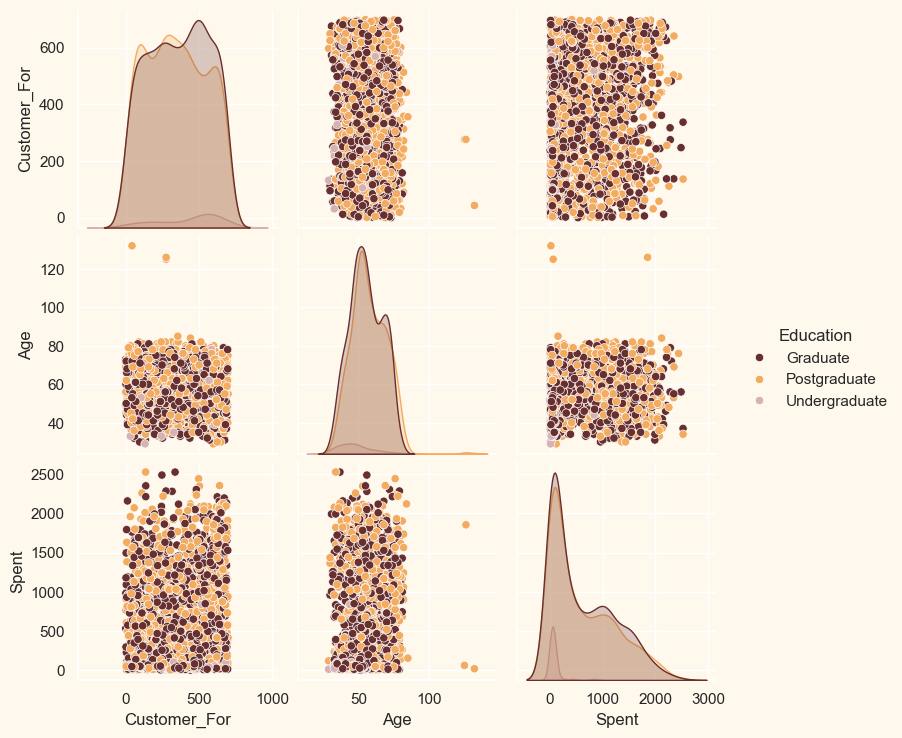

In [62]:
from matplotlib.colors import ListedColormap
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap=ListedColormap(pallet)

to_plot=['Customer_For','Age','Spent','Education']
sns.pairplot(data[to_plot], hue='Education',palette=(["#682F2F", "#F3AB60", "#D6B2B1"]))

In [63]:
obj_cols=['Education', 'Living_With']

In [64]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in obj_cols:
    data[i]=le.fit_transform(data[i])
    

In [65]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,1,663,68,1617,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,113,71,27,0
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,312,60,776,1
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,139,41,53,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,161,44,422,1


<Axes: >

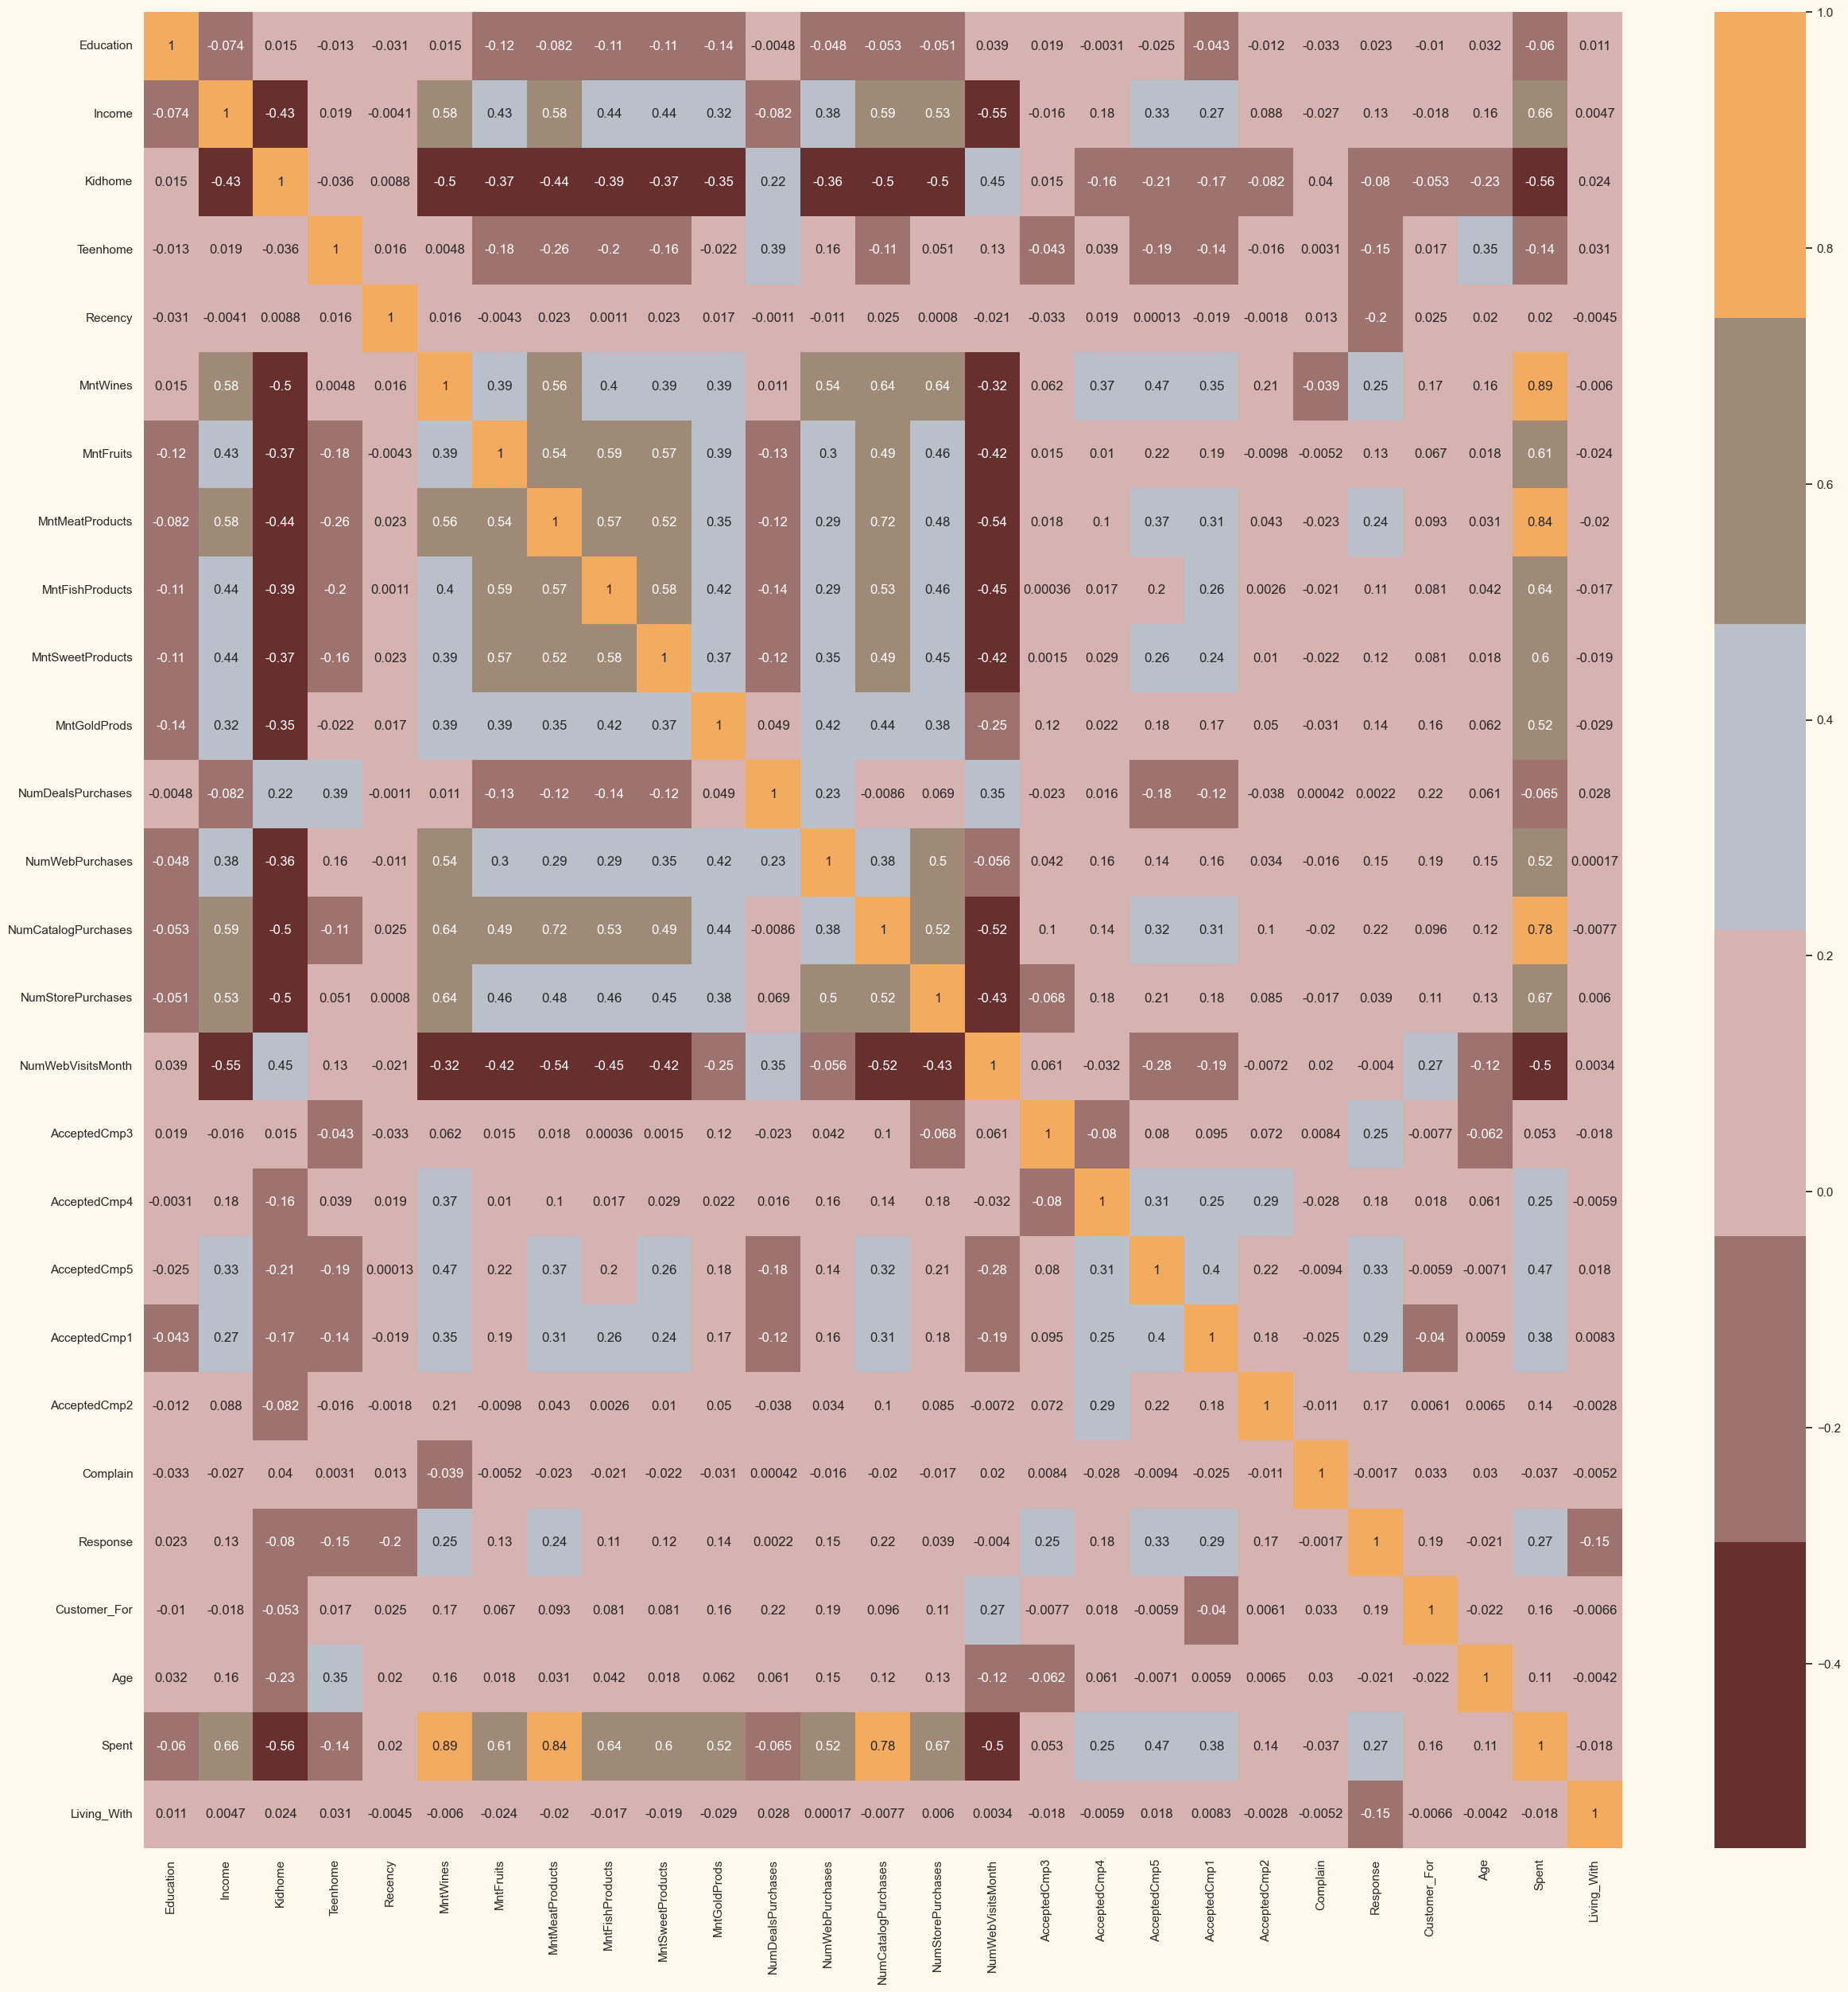

In [66]:
correlation=data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot=True, cmap=cmap)

In [74]:
ds=data.copy()
cols_del=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds=ds.drop(cols_del, axis=1)

In [103]:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(ds)
scaled_ds=pd.DataFrame(scaler.transform(ds), columns=ds.columns)


In [105]:
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With
0,-0.954727,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,1.531185,0.985345,1.679417,-1.346874
1,-0.954727,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-1.190545,1.235733,-0.961275,-1.346874
2,-0.954727,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.205773,0.317643,0.282673,0.742460
3,-0.954727,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-1.061881,-1.268149,-0.918094,0.742460
4,0.877826,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.953012,-1.017761,-0.305254,0.742460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.954727,0.358936,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,0.135680,0.150717,1.221032,0.742460
2236,0.877826,0.470432,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,-1.655713,1.903435,-0.268717,0.742460
2237,-0.954727,0.189476,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,-0.982703,-1.017761,1.054951,-1.346874
2238,0.877826,0.679401,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,0.799996,1.295237,-0.954831,-0.977755,1.068807,0.393948,0.742460


In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds=pd.DataFrame(pca.transform(scaled_ds), columns=['PC1', 'PC2', 'PC3'])
PCA_ds.describe()



,PC1,PC2,PC3
count,2.240000e+03,2.240000e+03,2.240000e+03
mean,-4.123686e-17,-1.268826e-17,-3.568574e-17
std,2.639203e+00,1.425454e+00,1.202082e+00
min,-5.189430e+00,-3.266343e+00,-5.030094e+00
25%,-2.455522e+00,-1.097667e+00,-8.326883e-01
50%,-6.736731e-01,-2.121462e-01,-2.997224e-02
75%,2.261732e+00,9.354383e-01,8.534238e-01
max,7.164229e+00,5.045575e+00,5.486138e+00


Text(0.5, 0, 'PC3')

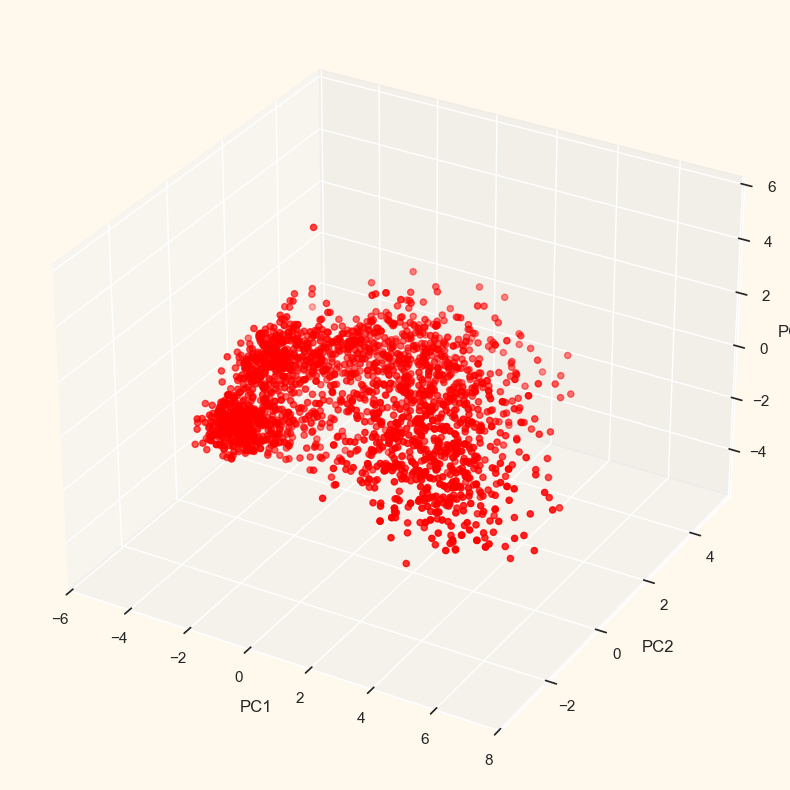

In [117]:

x,y,z=PCA_ds['PC1'],PCA_ds['PC2'],PCA_ds['PC3']

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='red', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [119]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

db=DBSCAN(eps=3, min_samples=100, metric='manhattan')
y_clust_db=db.fit(PCA_ds).labels_
PCA_ds['Clusters']=y_clust_db
data['Clusters']=y_clust_db

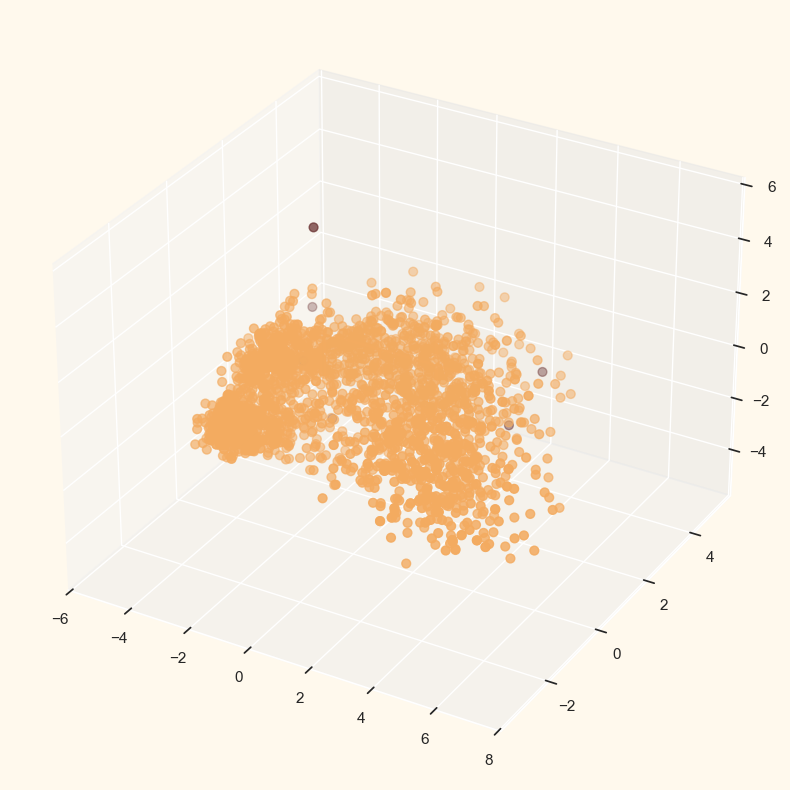

In [125]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d', label= 'bla')
ax.scatter(x,y,z,s=40, c=y_clust_db, marker='o', cmap=cmap)

In [131]:
ac=AgglomerativeClustering(n_clusters=4)
y_ac=ac.fit_predict(PCA_ds)

PCA_ds['Cluster_with_AC']=y_ac
data['Cluster_with_AC']=y_ac

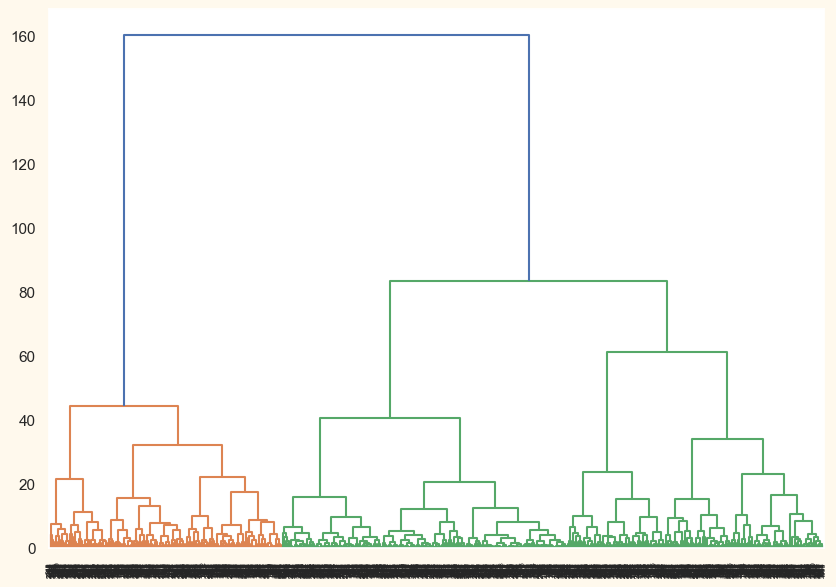

In [139]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage (PCA_ds, method= 'ward'))

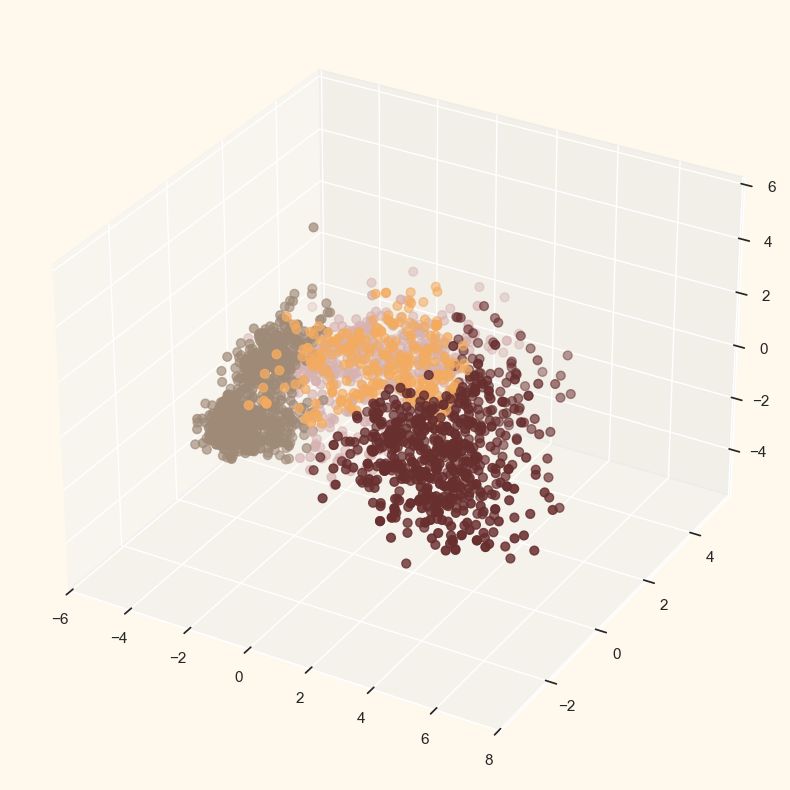

In [150]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d', label="bla")
ax.scatter(x,y,z,s=40, c=PCA_ds['Cluster_with_AC'], marker='o', cmap=cmap)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12016\2394204771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.countplot(x=data['Cluster_with_AC'], palette=pal)


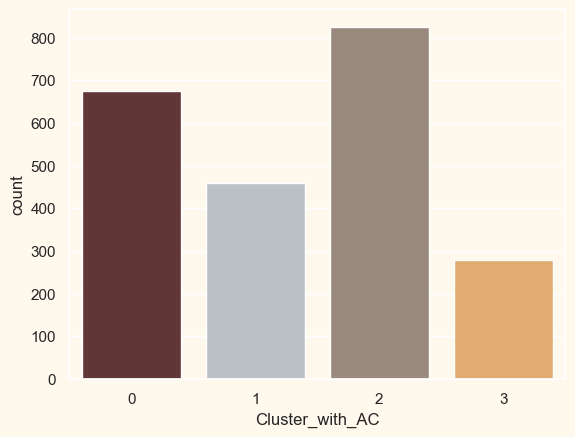

In [154]:
pal=["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.countplot(x=data['Cluster_with_AC'], palette=pal)

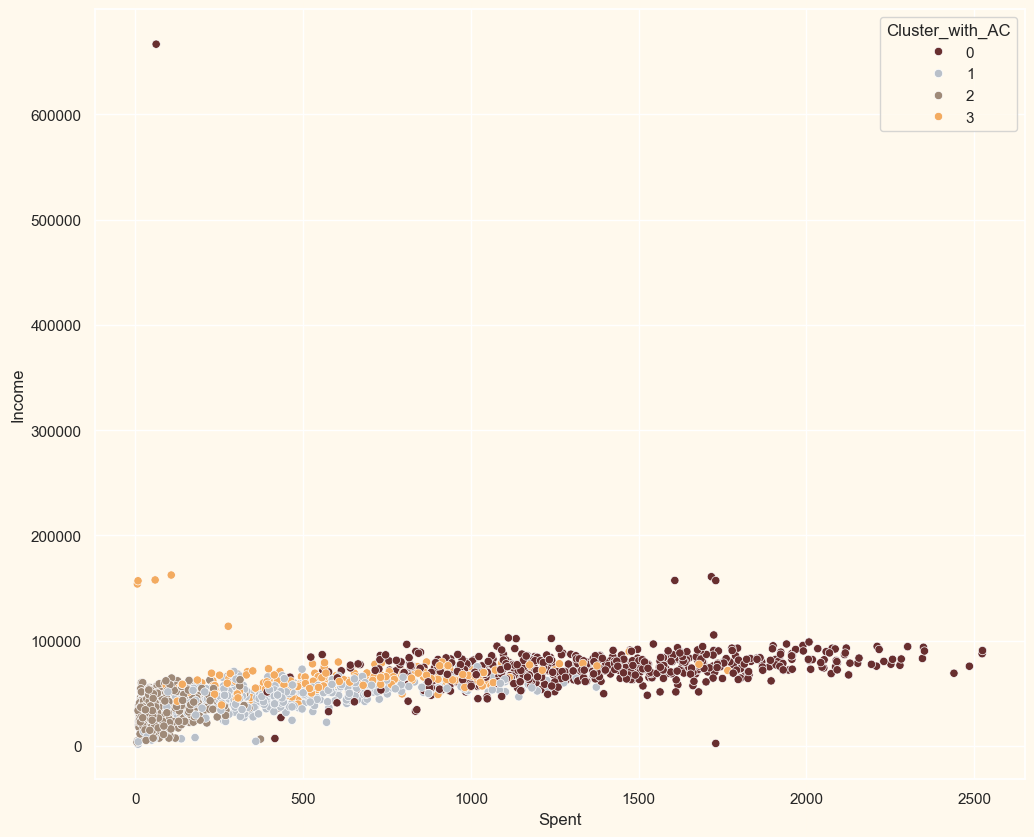

In [164]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=data,x='Spent',y='Income',hue='Cluster_with_AC',palette=pal)
plt.show()

Group 0: Mid-High income high expenditure
Group 1: Low income and low expenditure
Group 2: Lowere mid income mid expenditure
Group 3: Mid income low expenditure